<center><p><b>GUÍA PRÁCTICA 2 - MINERÍA DE DATOS<br>EDUARDO MENDIETA</b></p></center>

# Introducción



`Pandas` es un paquete de `Python` que nos facilita la manipulación y el análisis de datos. Incorpora estructuras de datos rápidas y flexibles diseñadas para trabajar con datos relacionales o etiquetados de manera intuitiva.

`Pandas` nos permite trabajar con diferentes tipos de datos:

- Tabulares con columnas heterogéneas, cómo `Excels`, `CSV` o tablas `SQL`
- Series temporales, ordenadas o no
- Matrices
- Datos estadísticos y observacionales de todo tipo

In [1]:
import pandas as pd

# Estructuras de datos

Las dos estructuras de datos que nos ofrece `Pandas` son las `Series` y el `DataFrame`.

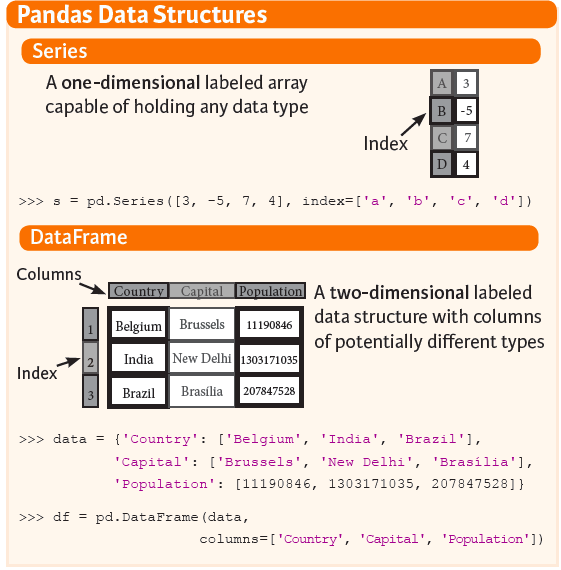![Pandas cheat sheet](images/pandas-02.png)

## Series

Las `Series` son `arrays` unidimensionales que pueden guardar datos de cualquier tipo, y tienen un `index`.

En este ejemplo vemos cómo podemos crear una `Series` donde el `index` corresponde al año y los valores la cantidad de $CO_2$ en la atmósfera medido en partes por millón.

## DataFrame

Los  `DataFrame` son `arrays` bidimensionales o matrices, indexados por filas y por columnas, y que también pueden guardar datos de cualquier tipo.

Por ejemplo, podemos crear un `DataFrame` con las frecuencias de los nombres más puestos en Catalunya durante el 2016 [según el Idescat](https://www.idescat.cat/nadons/).

# Selección de columnas

El `DataFrame` que usaremos en este ejemplo corresponde al dataset de la competición [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) de [Kaggle](https://www.kaggle.com/).

In [2]:
df = pd.read_csv('data/titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Podemos seleccionar una columna determinada de un `DataFrame`, por ejemplo, la columna _Name_ indistintamente con `df.Name` o `df['Name']`.

In [3]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [4]:
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [5]:
df.Name.equals(df['Name'])

True

Cada columna de nuestro `DataFrame` es un objeto de tipo `Series`.

In [6]:
type(df.Name)

pandas.core.series.Series

Para seleccionar más de una columna, utilizaremos un `array` con los nombres de las columnas.

In [7]:
df[['Name', 'Sex']].head()

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male


# Filtrado de filas

`Pandas` nos ofrece diferentes maneras para filtrar los datos de un `DataFrame`.

## Filtrado de filas basado en condiciones

En muchos de los casos querremos seleccionar un subconjunto de filas que cumplan alguna condición. Por ejemplo, podemos seleccionar aquellos pasajeros de hayan sobrevivido a la tragedia del Titanic.

In [8]:
survivors = df[df.Survived == 1]
survivors.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


La condición puede ser tan compleja como queramos. Por ejemplo, a continuación seleccionaremos aquellos pasajeros menores de 21 años que hayan sobrevivido y estuvieran en alguna cabina.

In [9]:
survivors = df[(df.Survived == 1) & (df.Age < 21) & ~(pd.isna(df.Cabin))]
survivors.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C


## Filtrado de filas con la función map

Para poder hacer filtros más complejos, a veces nos será muy útil la función [`map`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html). La función [`map`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) nos permite aplicar una función a todos los valores de un objeto `Series`. Recordemos que cada columna de nuestro `DataFrame` es individualmente un objeto del tipo `Series`.

En el siguiente ejemplo, aplicaremos una función a cada elemento de la columna `Name` que nos indicará si contiene el texto _Mr._.

In [10]:
df[df.Name.map(lambda name: 'Mr.' in name)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


# Dividir los datos en dos conjuntos de train y test

Un caso muy habitual en problemas de _machine learning_ es tener que dividir nuestro _datatset_ en dos trozos o _splits_: el _dataset_ de _train_ y el _dataset_ de _test_. El _dataset_ de _train_ nos servirá para entrenar el modelo con los métodos de _machine learning_ que escojamos. Y el _dataset_ de _test_, para evaluar el modelo a partir de comparar las predicciones del modelo en este último dataset.

En el cas más habitual, en el que nuestros datos no sean series temporales, dividiremos los datos en dos _splits_ aleatorios. A continuación veremos dos de las muchas maneras que tenemos para hacerlo.

[texto del enlace](https://)## Función sample

La función [`sample`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html) de `pandas` retorna una muestra aleatoria de nuestro _dataset_. En el ejemplo siguiente, primero crearemos el _dataset_ de _train_, especificando la proporción del _dataset_ original que queremos en el parámetro `frac`, y después asignaremos al _dataset_ de _test_ el resto de las filas que no han sido seleccionadas.

In [11]:
train = df.sample(frac=0.8, random_state=200)
test = df.drop(train.index)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.2750,D48,C
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q
753,754,0,3,"Jonkoff, Mr. Lalio",male,23.0,0,0,349204,7.8958,NaN,S
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S


## Sickit-learn

La segunda opción es utilizando la librería `Scikit-learn` nos proporciona herramientas simples y eficientes para hacer minería y análisis de datos, y además es de las más usadas en _machine learning_.


La función [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) divide nuestros datos en dos _datasets_ de _train_ y _test_ especificando la proporción del _dataset_ de _test_ en el parámetre `test_size`. Este segundo método nos permite explicitar cuál será nuestra variable dependiente, nuestra _y_ o _target_ en un posterior análisis, en nuestro caso la columna `Survived`.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Create the features matrix
X = df.drop('Survived', axis=1)

# Create the target vector
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
417,418,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.000,NaN,S
129,130,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.975,NaN,S
161,162,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.750,NaN,S
668,669,3,"Cook, Mr. Jacob",male,43.0,0,0,A/5 3536,8.050,NaN,S
149,150,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,NaN,S


In [14]:
y_train.head()

417    1
129    0
161    1
668    0
149    0
Name: Survived, dtype: int64